### Updates (New):
* Using new Accretion Mass Rate (2.12e+19)
* Using new Efficiency Factor (which makes more sense, 0.1)
* Magnetic Field seems to be working okay with these values.
* Changed the Variable names to their symbols to make the functions shorter (although they are still pretty long, especially for Flux and Specific Intensity) (example: Magnetic Field = B)
* Changed the structure of the Functions so that they lead into one another.
* Plotted the new plots, which are closer to the ones in the PDF they gave us on Canvas.
* **I got the Flat Jet Spectrum!!**
* But we still need to verify it:
    * We need to find the frequency interval in the slice we are on by using the Magnetic Field. 
    * We calculate the Flux in that frequency interval and then plot all the flux slices together.
    * Then add them all up to get the total flux.

* **$3 Hz$ to $10 Hz$** - A STRONG DECLINE
* $9.25 x 10^{-10} [erg/sec*(cm)^2]$ - Flux

### Updates:
* Tried to create an algorithm for plotting every slice with their individual frequency range using the Magnetic Field Strength but it does not work since there are a few things that needs to be arranged for it.
* Took Gamma ($\gamma$) as 100 instead of 1000 and got very similar values to the C and C hat values from the code they showed in class.
* Seems like the problem is the Absorption Coefficient (which also affects the Optical Depth values we have), could be because of the starting/constant values or the distance, length & frequency definitions.
* Plotted the following to compare the values we get to the "Check Flat Jet Spectrum" pdf they have provided in Canvas:
    * Total Power vs Distance (for $\nu$ = $10^{12} Hz$)
    * Total Power vs Frequency (for $z$ = $10^{-1} cm$)
    * Absorption Coefficient vs Distance (for $\nu$ = $10^{12} Hz$)
    * Absorption Coefficient vs Frequency (for $z$ = $10^{-1} cm$)
    * Optical Depth vs Distance (for $\nu$ = $10^{12} Hz$)
    * Optical Depth vs Frequency (for $z$ = $10^{-1} cm$)
    * Magnetic Field vs Distance (At the very end with other 4 plots.)

* Also, the "vs Frequency" plots are very off as all the values are decreasing way too fast compared to the plots they have provided to us.
-------------------------------------------------------------------------------

* Code this problem up by dividing your jet into slices (making sure you use even bins in logarithmic space!).
* Loop through the slices and calculate the Spectum from each slice!
* Then add to a Total Spectrum for the Entire Jet (or technically both jets). 
* Ideally you will plot Each Component as well as the Total to check that your $\nu_{SSA}$ is doing what you expect.
* To test your code, use an accretion power appropriate for Sgr A*, $r_{0} = 10 r_{g}$ and $\nu = 0.3c$. (but at this point don’t Lorentz transform anything, it’s not relativistic enough to be a huge effect). 
* Normalise your initial $L_{j}$ such that either $F_{\nu}$ in Janskys ($10^{−23} erg/cm^{−2}/sec/Hz$) or Total Power per Frequency bin ($erg/s/Hz$) matches the values for Sgr A* at $10^{12} Hz$.


In [114]:
#Importing the libraries we need.
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma as gammafunc #Needed for Absorption Coefficient

#We first define all the Constant values we have in cgs units!

q = 4.8e-10 #Electron Charge
mass_e = 9.1e-28 #Mass of electron
c = 3e10 #Speed of Light
velocity = 0.3 * c #Velocity of the Jet Plasma
p = 0.6
efficiency_factor = 0.1
gamma = 1000 #Lorentz Factor from the Observations
inclination = 45 #degrees

#We now find the GRS 1716-249's parameters.
frequency_SSA = 1e12 #Frequency of SSA in terms of Hz #NEEDED
mass_acc = 2.12e+15 #Mass Accretion Rate for GRS 1716-249 #NEEDED
mass_source = 7 #The mass of the GRS 1716-249 in terms of Solar Mass
edd_lum = 1.26e38 * mass_source #Eddington Luminosity
print(edd_lum)

#We also have to find the Gravitational Radius of the Source
mass_sun = 1.988e33 #The mass of the Sun in terms of cgs
G = 6.67e-8 #Gravitational Constant in terms of cgs
rg = (G*mass_source*mass_sun)/(c**2)  #Gravitational Radius of GRS 1716-249 in cm

#The initial Radius of the jet is as follows.
radius_initial = 10 * rg

#Eddington Rate
m_edd = (edd_lum)/(efficiency_factor * (c**2))
mass_acc = 0.75 * m_edd
print(mass_acc)

8.82e+38
7.35e+18


In [115]:
#We define the Distance to our source, in this case Sgr A*
D = 2.7e22 #cgs

#We also define an array for the length of the jet (which is the distance we
#cover but starting from the base which is zero).
z = np.logspace(-1, 3, 100) * rg #length

#From this, we can define our "Even Bin Slices"
#We can find the length difference (known as delta z) so basically the jet slice
#thickness per distance as follows.
delta_z = np.diff(z) #length_diff

#We won't check the last length since we won't check the last slice.
z = z[0:-1]

#We get the first delta z
delta_z_initial = delta_z[0]

In [116]:
#Now we define the change in Radius in time.
#From geometry we can do the following:
    #Since opening angle is 10 degrees and the half of it is 5 degrees,
    #taking the tangent of that angle will be equal to R(t)/D(t) so the
    #Radius divided by distance at the given time.
    #From here we can find R(t) = tan(5 deg) * D(t)
    
def Radius(z):
    """Takes the distance and returns the Radius of the slice of the jet at that
    distance."""
    
    #Defining radius using R(t) = tan(5 deg) * D(t)
    radius_time = radius_initial + (z * np.tan(np.deg2rad(5)))
    
    return radius_time

Radius(z)

array([10322325.19250183, 10323204.92096518, 10324170.42186766,
       10325230.05791623, 10326393.0071714 , 10327669.34254328,
       10329070.11903827, 10330607.46951226, 10332294.70975959,
       10334146.45384812, 10336178.7406993 , 10338409.17300959,
       10340857.06971665, 10343543.63333071, 10346492.13358056,
       10349728.10896482, 10353279.58795421, 10357177.33176074,
       10361455.10077662, 10366149.94699061, 10371302.53491465,
       10376957.49380037, 10383163.80419637, 10389975.22219424,
       10397450.74503816, 10405655.12213078, 10414659.41586156,
       10424541.61711524, 10435387.32079151, 10447290.46718711,
       10460354.15566177, 10474691.53763549, 10490426.79665205,
       10507696.22399744, 10526649.39918978, 10547450.48556555,
       10570279.65218386, 10595334.6343647 , 10622832.44637762,
       10653011.26111556, 10686132.4730345 , 10722482.96222716,
       10762377.57924118, 10806161.87216388, 10854215.07959453,
       10906953.41542765, 10964833.67389

In [117]:
#For Magnetic Field calculations, we will have to use the initial Magnetic Field
#and initial Area due to the conservation of the Magnetic Flux throughout the
#jet we have.

#We first find the initial Magnetic Field.
#For this we use the following formulae:
    # -> U_total = U_e + U_b
    # -> U_total = 2U_b (Due to Equipartition)
    # -> U_total = 2(B^2/8π)

#We first find the initial Area.
Area_initial = np.pi * (radius_initial ** 2)

#Then we use this to find the initial Magnetic Field.
#Note that we split the Numerator and Denominator since it would be complicated
#for one line of code.
Magnetic_Field_initial_1 = 4 * np.pi * efficiency_factor * mass_acc * (c ** 2)
Magnetic_Field_initial_2 = Area_initial * velocity

Magnetic_Field_initial = np.sqrt(Magnetic_Field_initial_1/Magnetic_Field_initial_2)

print("Initial Magnetic Field:", Magnetic_Field_initial, "Gauss")

Initial Magnetic Field: 52574593.15995939 Gauss


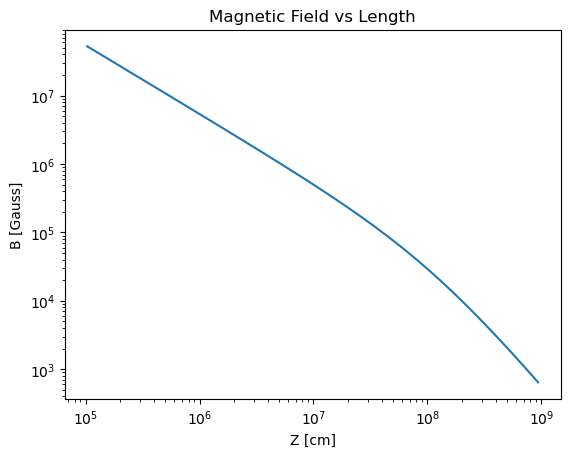

In [118]:
#Now we need to define the Source Function to find the Specific Intensity per
#slice.
#First, we need to define the Total Power of the jet.
#Since the Total Power of the Jet has two terms that depends on Radius,
#we define them first.

#First parameter that depends on Radius is the Magnetic Field.
def B(z, delta_z):
    """Takes the distance and calculates the Magnetic Field Strength 
    at that distance."""
    
    #We first find the initial Area.
    Area_initial_B = radius_initial * delta_z_initial
    
    #Then we find the current Area of the jet.
    Area_B = Radius(z) * delta_z
    
    #Now we can find the Magnetic Field for every distance thanks to the
    #Magnetic Flux being conserved throughout the jet.
    magnetic_field = (Magnetic_Field_initial * Area_initial_B) / (Area_B)
    
    #print(Magnetic_Field_initial * Area_initial_B)
    #print(magnetic_field * Area_B)
    return magnetic_field

B(z, delta_z)

plt.figure()
plt.plot(z, B(z, delta_z))
plt.title("Magnetic Field vs Length")
plt.xlabel("Z [cm]")
plt.ylabel(r"B [Gauss]")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [119]:
#We define the function for frequency interval.
def Frequency(B):
    """Takes the distance and calculates the Frequency Interval, using the
    initial and final Magnetic Field Strength."""
    
    #We get the Magnetic Field Strength array.
    magnetic_field_array = B

    #We find the lower and upper frequency limits.
    lower_frequency = (3*(1**2)*q*magnetic_field_array[-1])/(2*mass_e*c)
    upper_frequency = (3*(gamma**2)*q*magnetic_field_array[0])/(2*mass_e*c)

    #We divide by 2pi since it is the Angular Frequency
    lower_frequency = lower_frequency/(2*np.pi)
    upper_frequency = upper_frequency/(2*np.pi)
    
    #We find the frequency interval that is in logspace.
    lower_frequency = format(lower_frequency, "e")
    upper_frequency = format(upper_frequency, "e")
    
    #We strip the exponential part of the frequencies.
    lower_frequency = (lower_frequency.split("e"))
    upper_frequency = (upper_frequency.split("e"))

    #Now we get the exponent part of the frequencies.
    lower_frequency = int(lower_frequency[1])
    upper_frequency = int(upper_frequency[1])

    #Now we use these to find the frequency interval.
    frequency = np.logspace(lower_frequency, upper_frequency, 100)
    frequency = np.logspace(0, 14, 100)
    
    return frequency[0:-1]

Frequency(B(z, delta_z))

array([1.00000000e+00, 1.38488637e+00, 1.91791026e+00, 2.65608778e+00,
       3.67837977e+00, 5.09413801e+00, 7.05480231e+00, 9.77009957e+00,
       1.35304777e+01, 1.87381742e+01, 2.59502421e+01, 3.59381366e+01,
       4.97702356e+01, 6.89261210e+01, 9.54548457e+01, 1.32194115e+02,
       1.83073828e+02, 2.53536449e+02, 3.51119173e+02, 4.86260158e+02,
       6.73415066e+02, 9.32603347e+02, 1.29154967e+03, 1.78864953e+03,
       2.47707636e+03, 3.43046929e+03, 4.75081016e+03, 6.57933225e+03,
       9.11162756e+03, 1.26185688e+04, 1.74752840e+04, 2.42012826e+04,
       3.35160265e+04, 4.64158883e+04, 6.42807312e+04, 8.90215085e+04,
       1.23284674e+05, 1.70735265e+05, 2.36448941e+05, 3.27454916e+05,
       4.53487851e+05, 6.28029144e+05, 8.69749003e+05, 1.20450354e+06,
       1.66810054e+06, 2.31012970e+06, 3.19926714e+06, 4.43062146e+06,
       6.13590727e+06, 8.49753436e+06, 1.17681195e+07, 1.62975083e+07,
       2.25701972e+07, 3.12571585e+07, 4.32876128e+07, 5.99484250e+07,
      

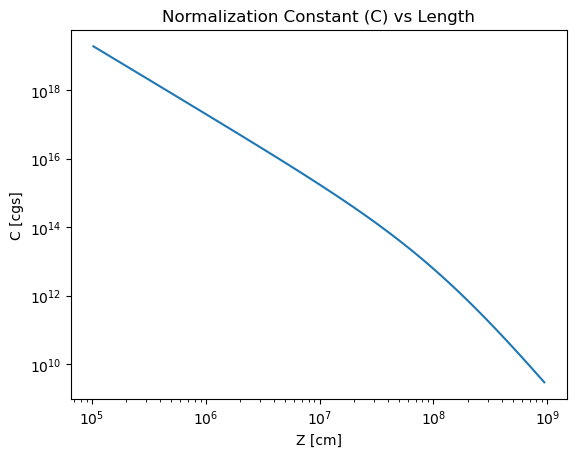

In [120]:
#Next, we define the Normalization Constant for the Power.
def C(B):
    """Takes the distance and calculates the Normalization Constant for Power
    so "C" at that time."""
    
    #Assuming Equipartition, since U_e = U_b we can write the following for the
    #first part of the normalization constant C hat.
    normalization_constant_1 = (B**2) / (8*np.pi)
    
    #We need to divide U_e with the logarithm of the Lorentz Factor we have.
    #For that we write the second part of the normalization constant.
    normalization_constant_2 = np.log(gamma)
    
    #From here, C hat can be written as follows.
    normalization_constant = normalization_constant_1 / normalization_constant_2
    
    #So far we got the C hat.
    #Since C is equal to C hat divided by the mass of electron and speed of 
    #light squared we can write the following.
    normalization_constant = normalization_constant / (mass_e * (c ** 2))
    
    return normalization_constant

C(B(z, delta_z))

plt.figure()
plt.plot(z, C(B(z, delta_z)))
plt.title(r"Normalization Constant (C) vs Length")
plt.xlabel("Z [cm]")
plt.ylabel(r"C [cgs]")
plt.xscale("log")
plt.yscale("log")
plt.show()

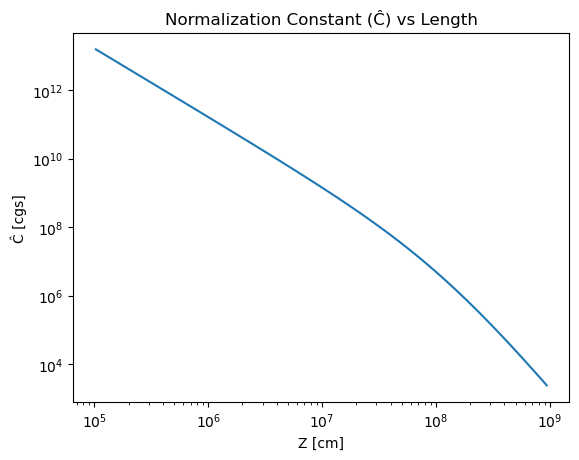

In [121]:
#Now we can also define the Normalization Constant for Absorption Coefficient.
def C_hat(B):
    """Takes the distance and calculates the Normalization Constant for 
    Absorption Coefficient so "C hat" at that time."""
    
    #Assuming Equipartition, since U_e = U_b we can write the following for the
    #first part of the normalization constant C hat.
    normalization_constant_1 = (B**2) / (8*np.pi)
    
    #We need to divide U_e with the logarithm of the Lorentz Factor we have.
    #For that we write the second part of the normalization constant.
    normalization_constant_2 = np.log(gamma)
    
    #From here, C hat can be written as follows.
    normalization_constant = normalization_constant_1 / normalization_constant_2
    
    return normalization_constant

C_hat(B(z, delta_z))

plt.figure()
plt.plot(z, C_hat(B(z, delta_z)))
plt.title(r"Normalization Constant (Ĉ) vs Length")
plt.xlabel("Z [cm]")
plt.ylabel(r"Ĉ [cgs]")
plt.xscale("log")
plt.yscale("log")
plt.show()

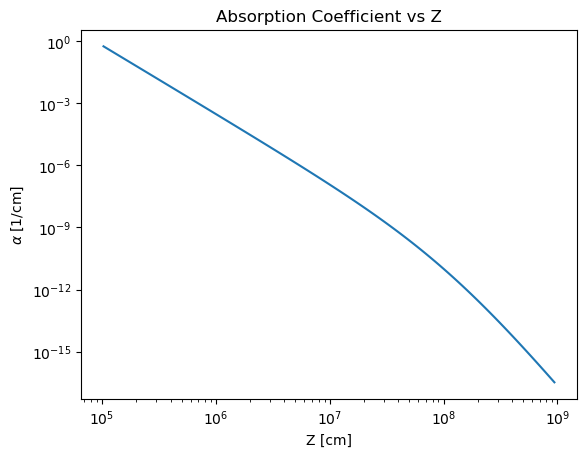

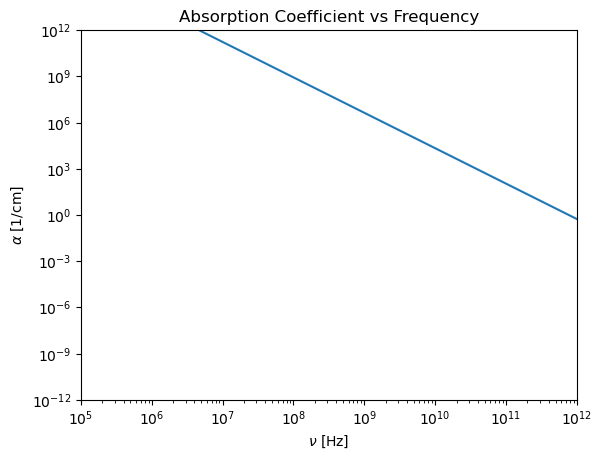

In [122]:
#Now we define the Absorption Coefficient. (Using the formula from the question)
def alpha_nu(B, C_hat, frequency):
    """Takes the distance and the frequency, then calculates the Absorption 
    Coefficient at that distance and frequency."""
    
    #We will split all the multiplications to avoid writing the whole equation
    #in one line.
    abs_coeff_1 = (np.sqrt(3)*pow(q,3))/(8*np.pi*mass_e)
    abs_coeff_2 = ((3*q)/(2*math.pi*pow(mass_e,3)*pow(c,5))) ** (p/2)
    abs_coeff_3 = C_hat
    abs_coeff_4 = B ** ((p+2)/2)
    abs_coeff_5 = math.gamma(((3*p+2)/12)) * math.gamma(((3*p+22)/12))
    abs_coeff_6 = frequency ** (-(p+4)/2)

    #Absorption Coefficient
    abs_coeff = abs_coeff_1 * abs_coeff_2 * abs_coeff_3 * abs_coeff_4 * abs_coeff_5 * abs_coeff_6

    return abs_coeff

alpha_nu(B(z, delta_z), C_hat(B(z, delta_z)), Frequency(B(z, delta_z)))

plt.figure()
plt.plot(z, alpha_nu(B(z, delta_z), C_hat(B(z, delta_z)), frequency_SSA))
plt.title("Absorption Coefficient vs Z")
plt.xlabel("Z [cm]")
plt.ylabel(r"$\alpha$ [1/cm]")
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.figure()
plt.plot(Frequency(B(z, delta_z)), alpha_nu(B(z, delta_z)[0], C_hat(B(z, delta_z))[0], Frequency(B(z, delta_z))))
plt.title("Absorption Coefficient vs Frequency")
plt.xlabel(r"$\nu$ [Hz]")
plt.ylabel(r"$\alpha$ [1/cm]")
plt.xlim(1e5, 1e12)
plt.ylim(1e-12, 1e12)
plt.xscale("log")
plt.yscale("log")
plt.show()

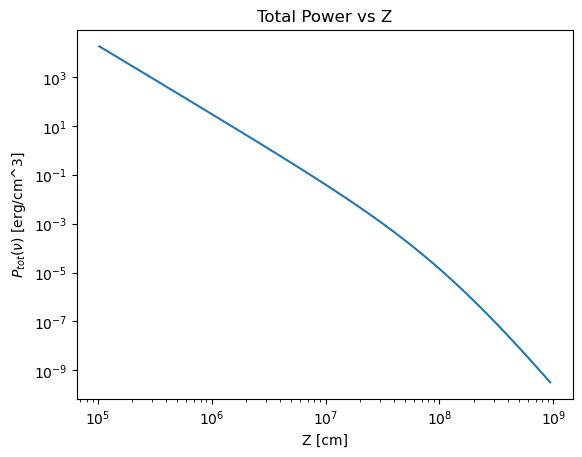

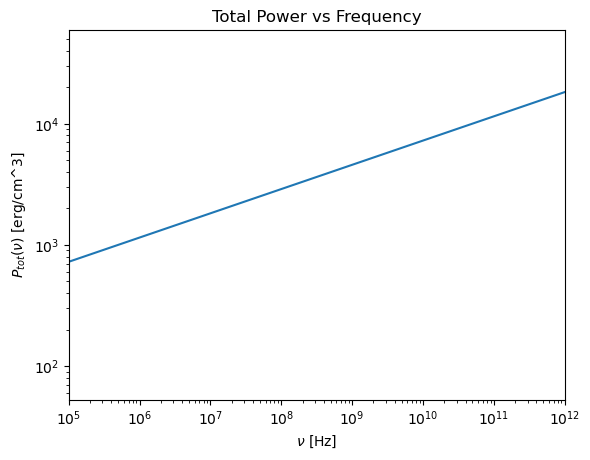

In [123]:
#Now we define the Total Power. (Using the Formula from the question)
def P_total(B, C, frequency):
    """Takes the distance and the frequency, then calculates the Total Power 
    at that distance and frequency."""
    
    #We will split all the multiplications to avoid writing the whole equation
    #in one line.
    total_power_1 = (1e-22)/(p+1)
    total_power_2 = C
    total_power_3 = B
    total_power_4 = ((1e-7 * frequency)/(B)) ** (-(p-1)/2)

    #Total Power
    total_power = total_power_1 * total_power_2 * total_power_3 * total_power_4
    
    return total_power

P_total(B(z, delta_z), C(B(z, delta_z)), Frequency(B(z, delta_z)))

plt.figure()
plt.plot(z, P_total(B(z, delta_z), C(B(z, delta_z)), frequency_SSA))
plt.title("Total Power vs Z")
plt.xlabel("Z [cm]")
plt.ylabel(r"$P_{tot}(\nu)$ [erg/cm^3]")
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.figure()
plt.plot(Frequency(B(z, delta_z)), P_total(B(z, delta_z)[0], C(B(z, delta_z))[0], Frequency(B(z, delta_z))))
plt.title("Total Power vs Frequency")
plt.xlabel(r"$\nu$ [Hz]")
plt.ylabel(r"$P_{tot}(\nu)$ [erg/cm^3]")
plt.xlim(1e5, 1e12)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [124]:
#Now we can get the Source Function.
def S_nu(P_total, alpha_nu):
    """Takes the distance and the frequency, then calculates the Source Function
    at that distance and frequency."""
    
    source_function = P_total / (4 * np.pi * alpha_nu)
    
    return source_function

S_nu(P_total(B(z, delta_z), C(B(z, delta_z)), Frequency(B(z, delta_z))), alpha_nu(B(z, delta_z), C_hat(B(z, delta_z)), Frequency(B(z, delta_z))))

array([2.64672808e-27, 6.25842719e-27, 1.47986768e-26, 3.49931103e-26,
       8.27454984e-26, 1.95662946e-25, 4.62674337e-25, 1.09406998e-24,
       2.58712813e-24, 6.11778522e-24, 1.44668607e-23, 3.42104294e-23,
       8.08997741e-23, 1.91311506e-22, 4.52418499e-22, 1.06990602e-21,
       2.53021547e-21, 5.98379375e-21, 1.41515385e-20, 3.34687429e-20,
       7.91561536e-20, 1.87214906e-19, 4.42800020e-19, 1.04733932e-18,
       2.47731346e-18, 5.85989203e-18, 1.38616462e-17, 3.27912620e-17,
       7.75749149e-17, 1.83529647e-16, 4.34225139e-16, 1.02742414e-15,
       2.43115750e-15, 5.75317579e-15, 1.36155862e-14, 3.22257019e-14,
       7.62797480e-14, 1.80576289e-13, 4.27524418e-13, 1.01231186e-12,
       2.39731875e-12, 5.67806764e-12, 1.34506839e-11, 3.18686276e-11,
       7.55203880e-11, 1.79000442e-10, 4.24366187e-10, 1.00631173e-09,
       2.38692244e-09, 5.66327484e-09, 1.34409734e-08, 3.19108527e-08,
       7.57883116e-08, 1.80067110e-07, 4.28003945e-07, 1.01778466e-06,
      

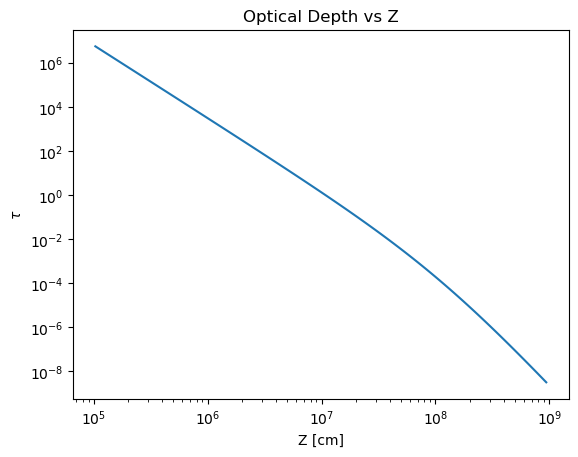

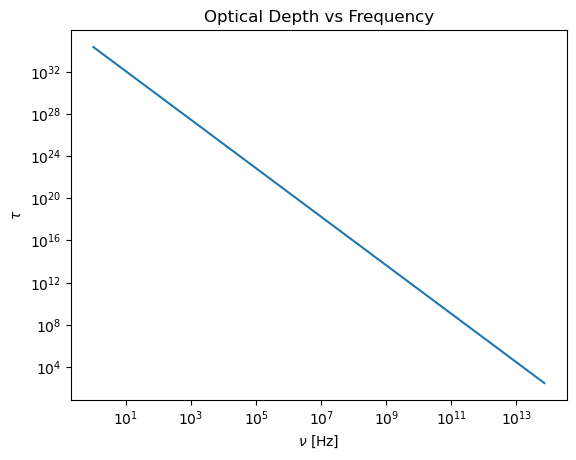

In [125]:
#Now we also can get the Optical Depth.
def tau(alpha_nu, Radius):
    """Takes the distance and frequency, then calculates the Optical Depth at 
    that distance and frequency."""
    
    optical_depth = alpha_nu * Radius
    
    return optical_depth

tau(alpha_nu(B(z, delta_z), C_hat(B(z, delta_z)), Frequency(B(z, delta_z))), Radius(z))

plt.figure()
plt.plot(z, tau(alpha_nu(B(z, delta_z), C_hat(B(z, delta_z)), frequency_SSA), Radius(z)))
plt.title("Optical Depth vs Z")
plt.xlabel("Z [cm]")
plt.ylabel(r"$\tau$")
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.figure()
plt.plot(Frequency(B(z, delta_z)), tau(alpha_nu(B(z, delta_z)[0], C_hat(B(z, delta_z)[0]), Frequency(B(z, delta_z))), Radius(z)[0]))
plt.title("Optical Depth vs Frequency")
plt.xlabel(r"$\nu$ [Hz]")
plt.ylabel(r"$\tau$")
#plt.xlim(1e5, 1e12)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [126]:
#We can now define the Intensity at given distance!
def I_nu(S_nu, tau):
    """Takes the distance and frequency, then calculates the Specific Intensity 
    at that distance and frequency."""

    specific_intensity = S_nu * (1 - np.exp(-tau))

    return specific_intensity

I_nu(S_nu(P_total(B(z, delta_z), C(B(z, delta_z)), Frequency(B(z, delta_z))), alpha_nu(B(z, delta_z), C_hat(B(z, delta_z)), Frequency(B(z, delta_z)))), tau(alpha_nu(B(z, delta_z), C_hat(B(z, delta_z)), Frequency(B(z, delta_z))), Radius(z)))

array([2.64672808e-27, 6.25842719e-27, 1.47986768e-26, 3.49931103e-26,
       8.27454984e-26, 1.95662946e-25, 4.62674337e-25, 1.09406998e-24,
       2.58712813e-24, 6.11778522e-24, 1.44668607e-23, 3.42104294e-23,
       8.08997741e-23, 1.91311506e-22, 4.52418499e-22, 1.06990602e-21,
       2.53021547e-21, 5.98379375e-21, 1.41515385e-20, 3.34687429e-20,
       7.91561536e-20, 1.87214906e-19, 4.42800020e-19, 1.04733932e-18,
       2.47731346e-18, 5.85989203e-18, 1.38616462e-17, 3.27912620e-17,
       7.75749149e-17, 1.83529647e-16, 4.34225139e-16, 1.02742414e-15,
       2.43115750e-15, 5.75317579e-15, 1.36155862e-14, 3.22257019e-14,
       7.62797480e-14, 1.80576289e-13, 4.27524418e-13, 1.01231186e-12,
       2.39731875e-12, 5.67806764e-12, 1.34506839e-11, 3.18686276e-11,
       7.55203880e-11, 1.79000442e-10, 4.24366187e-10, 1.00631173e-09,
       2.38692244e-09, 5.66327484e-09, 1.34409734e-08, 3.19108527e-08,
       7.57883116e-08, 1.80067110e-07, 4.28003945e-07, 1.01778466e-06,
      

In [127]:
#From here, we finally define our Flux which depends on Intensity, Area of
#the emitting surface and our distance to the slice.

def Flux(I_nu, Radius, delta_z, D, frequency):
    """Takes the distance array then calculates the Flux at that frequency
    interval."""
    
    #We define an array for flux values for the distance we are in.
    flux_distance = np.zeros(len(frequency))
    
    #Now we find the flux for each frequency in order to create an array of our
    #frequency and flux values, which will give us the spectrum for that 
    #distance.
    
    #We also do the conversion from erg/cm^2 to mJy here.
    #(1 Jy = 1e-23 erg/cm^2 => 1 mJy = 1e-20 erg/cm^2)
    flux_1 = (4 * np.pi) * ((I_nu)/1e-26)
    flux_2 = (2 * np.pi * Radius * delta_z * np.sin(np.deg2rad(inclination)))
    flux_3 = (4 * np.pi * (D**2))
    
    #We add the fluxes to our flux_distance array, which will be an array 
    #that gives us the spectrum for that distance.
    flux_distance = (flux_1 * flux_2)/(flux_3)
    
    return flux_distance

flux = Flux(I_nu(S_nu(P_total(B(z, delta_z), C(B(z, delta_z)), Frequency(B(z, delta_z))), alpha_nu(B(z, delta_z), C_hat(B(z, delta_z)), Frequency(B(z, delta_z)))), tau(alpha_nu(B(z, delta_z), C_hat(B(z, delta_z)), Frequency(B(z, delta_z))), Radius(z))), Radius(z), delta_z, D, Frequency(B(z, delta_z)))

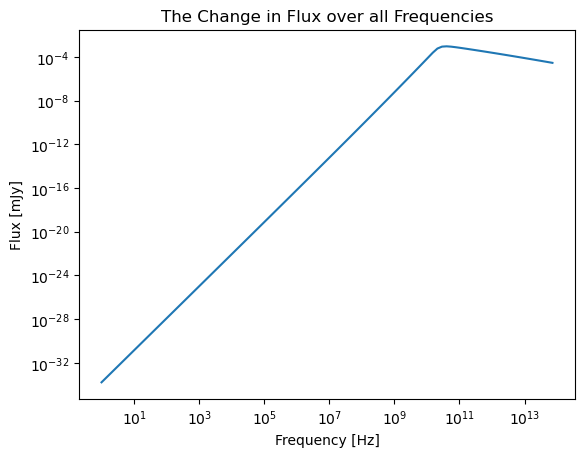

In [128]:
plt.figure()
plt.plot(Frequency(B(z, delta_z)), flux)
plt.title("The Change in Flux over all Frequencies")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Flux [mJy]")
plt.xscale("log")
plt.yscale("log")

plt.show()

In [129]:
#We define a frequency function for each slice we have.
#We define the function for frequency interval.
def Frequency_for_slice(B):
    """Takes the distance and calculates the Frequency Interval, using the
    initial and final Magnetic Field Strength."""
    
    #We get the Magnetic Field Strength array.
    magnetic_field_array = B

    #We find the lower and upper frequency limits.
    lower_frequency = (3*(1**2)*q*magnetic_field_array)/(2*mass_e*c)
    upper_frequency = (3*(gamma**2)*q*Magnetic_Field_initial)/(2*mass_e*c)

    #We divide by 2pi since it is the Angular Frequency
    lower_frequency = lower_frequency/(2*np.pi)
    upper_frequency = upper_frequency/(2*np.pi)
    
    #We find the frequency interval that is in logspace.
    lower_frequency = format(lower_frequency, "e")
    upper_frequency = format(upper_frequency, "e")
    
    #We strip the exponential part of the frequencies.
    lower_frequency = (lower_frequency.split("e"))
    upper_frequency = (upper_frequency.split("e"))

    #Now we get the exponent part of the frequencies.
    lower_frequency = int(lower_frequency[1])
    upper_frequency = int(upper_frequency[1])

    #Now we use these to find the frequency interval.
    frequency = np.logspace(lower_frequency, upper_frequency, 100)
    frequency = np.logspace(3, 14, 100)
    
    return frequency[0:-1]

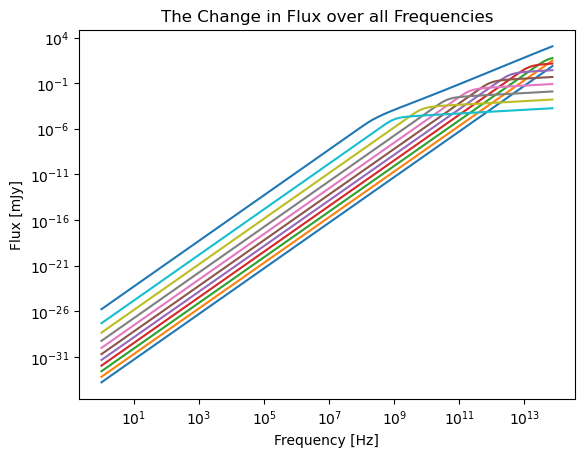

9.25e+16


In [130]:
#Now for every distance we have, we will calculate a spectrum.
#Every distance means a slice, we will add them up in order to get our
#complete spectrum of the jet.

#We define a new array for our total flux for all slices.
total_flux = np.zeros(len(Frequency(B(z, delta_z))))

plt.figure()

for i in range(len(z)):
    #We define an array for the summary of the fluxes.
    total_flux_distance = np.zeros(len(Frequency(B(z, delta_z))))
    
    #We find the flux for the given distance.
    flux = Flux(I_nu(S_nu(P_total(B(z[i], delta_z[i]), C(B(z[i], delta_z[i])), Frequency(B(z, delta_z))), alpha_nu(B(z[i], delta_z[i]), C_hat(B(z[i], delta_z[i])), Frequency(B(z, delta_z)))), tau(alpha_nu(B(z[i], delta_z[i]), C_hat(B(z[i], delta_z[i])), Frequency(B(z, delta_z))), Radius(z[i]))), Radius(z[i]), delta_z[i], D, Frequency(B(z, delta_z)))
    
    #We add the fluxes to our total_flux_distance array.
    total_flux_distance = np.add(total_flux_distance, flux)
    
    #Now we add the values to our Total Flux array.
    total_flux = np.add(total_flux, flux)
    
    if i%10 == 0:
        plt.plot(Frequency(B(z, delta_z)), flux)
                      
#We plot the Frequency with Flux.
#(1 Jy = 1e-23 erg/cm^2)
plt.plot(Frequency(B(z, delta_z)), total_flux)

#We also add Labels and Title.
plt.title("The Change in Flux over all Frequencies")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Flux [mJy]")
plt.xscale("log")
plt.yscale("log")

plt.show()

print(9.25e-10/1e-26)